In [1]:
from tsai.all import *

In [2]:
import os
from random import randint
import sklearn.metrics as skm
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBRegressor
import scipy.stats as st
from function import *
data = pd.read_excel("2021年6~8月.xlsx")

IQR(data)
data = process_data(data)
# 定义测试集的大小比例，例如20%
test_size = int(len(data) * 0.2)
# data_test = data[-test_size:]
# data = data[:-test_size]
y=data['逐时负荷/kWh']


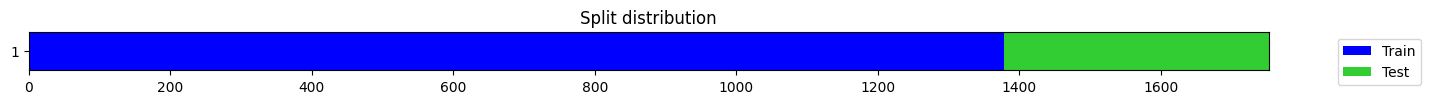

epoch,train_loss,valid_loss,mae,time
0,346614400.000000,279315488.000000,11433.018555,00:00


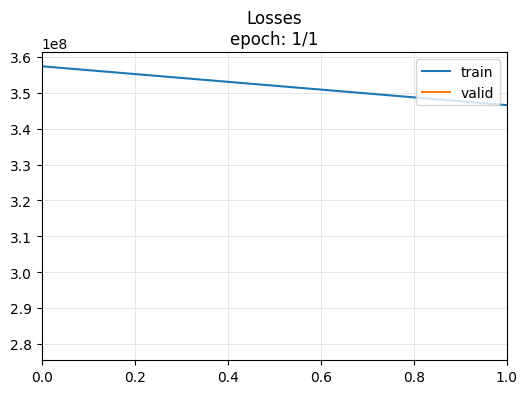

not enough values to plot a chart


In [6]:

ts=y
X, y = SlidingWindow(60, horizon=1)(ts)
# 划分数据集
splits = TimeSplitter(test_size)(y)
splits
# 设置转换
tfms = [None, TSForecasting()]
batch_tfms = TSStandardize()
# 创建和训练模型
fcst = TSForecaster(X, y, splits=splits, path='models', tfms=tfms, batch_tfms=batch_tfms, bs=512, arch="TSiT", metrics=mae, cbs=ShowGraph())
fcst.fit_one_cycle(1, 1e-1)

# 保存模型
fcst.export("TSiT.pkl")

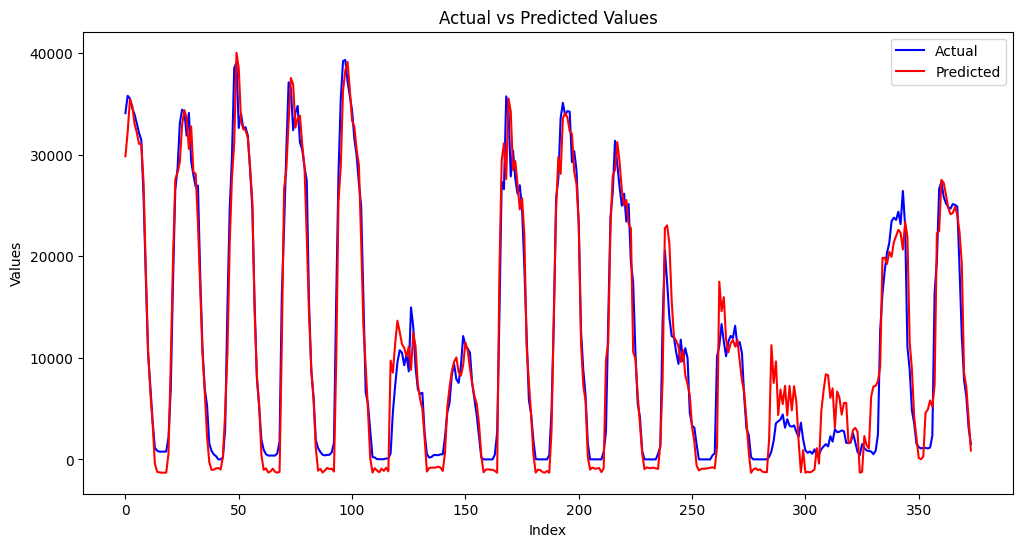

tensor([[ 2.9832e+04],
        [ 3.2253e+04],
        [ 3.5430e+04],
        [ 3.4815e+04],
        [ 3.3061e+04],
        [ 3.2179e+04],
        [ 3.1065e+04],
        [ 3.1012e+04],
        [ 2.7231e+04],
        [ 1.8694e+04],
        [ 1.0704e+04],
        [ 6.5967e+03],
        [ 3.5274e+03],
        [-4.2434e+02],
        [-1.2207e+03],
        [-1.2726e+03],
        [-1.3089e+03],
        [-1.3083e+03],
        [-1.2971e+03],
        [ 5.8101e+02],
        [ 9.6132e+03],
        [ 1.9715e+04],
        [ 2.7548e+04],
        [ 2.8224e+04],
        [ 2.9243e+04],
        [ 3.2935e+04],
        [ 3.4370e+04],
        [ 3.3624e+04],
        [ 3.0557e+04],
        [ 3.2773e+04],
        [ 2.8274e+04],
        [ 2.8103e+04],
        [ 2.3158e+04],
        [ 1.6916e+04],
        [ 1.0432e+04],
        [ 6.6450e+03],
        [ 2.2759e+03],
        [-2.7300e+02],
        [-1.0317e+03],
        [-1.0090e+03],
        [-8.7475e+02],
        [-8.4957e+02],
        [-9.8711e+02],
        [ 2

In [7]:
from tsai.inference import load_learner

fcst = load_learner("models/TST.pkl", cpu=False)
raw_preds, target, preds = fcst.get_X_preds(X[splits[1]], y[splits[1]])
raw_preds
# torch.Size([235, 1])
plt.figure(figsize=(12, 6))
X=range(test_size)
plt.plot(X, target, label='Actual', color='blue')
plt.plot(X, preds, label='Predicted', color='red')
plt.legend()
plt.title('Actual vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Values')
plt.show()
R_square = r2_score(target, preds)
R_square
raw_preds